In [128]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
df = pd.read_csv("India GDP 1960-2022.csv")

In [130]:
df.head()

,Unnamed: 0,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,NaN,Year,GDP,Per Capita,Growth
1,0.0,2021,"$3,173.40B","$2,277",8.95%
2,1.0,2020,"$2,667.69B","$1,933",-6.60%
3,2.0,2019,"$2,831.55B","$2,072",3.74%
4,3.0,2018,"$2,702.93B","$1,998",6.45%


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     62 non-null     float64
 1   India GDP - Historical Data    63 non-null     object 
 2   India GDP - Historical Data.1  63 non-null     object 
 3   India GDP - Historical Data.2  63 non-null     object 
 4   India GDP - Historical Data.3  63 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.6+ KB


In [132]:
# Checking For Null Values 
df.isnull().sum()

Unnamed: 0                       1
India GDP - Historical Data      0
India GDP - Historical Data.1    0
India GDP - Historical Data.2    0
India GDP - Historical Data.3    0
dtype: int64

In [133]:
df.count()

Unnamed: 0                       62
India GDP - Historical Data      63
India GDP - Historical Data.1    63
India GDP - Historical Data.2    63
India GDP - Historical Data.3    63
dtype: int64

In [134]:
df = df.rename(columns={"India GDP - Historical Data":"Year", "India GDP - Historical Data.1": "GDP", "India GDP - Historical Data.2": "Per Capita", "India GDP - Historical Data.3": "Growth"})
df.head()

,Unnamed: 0,Year,GDP,Per Capita,Growth
0,NaN,Year,GDP,Per Capita,Growth
1,0.0,2021,"$3,173.40B","$2,277",8.95%
2,1.0,2020,"$2,667.69B","$1,933",-6.60%
3,2.0,2019,"$2,831.55B","$2,072",3.74%
4,3.0,2018,"$2,702.93B","$1,998",6.45%


In [135]:
df = df.drop(["Unnamed: 0"], axis = 1)

In [136]:
df = df.drop([0])

In [137]:
df.head(2)

,Year,GDP,Per Capita,Growth
1,2021,"$3,173.40B","$2,277",8.95%
2,2020,"$2,667.69B","$1,933",-6.60%


In [140]:
df['GDP'] = df['GDP'].replace('[\$\,\.\"B"]', '', regex=True).astype(int)
df['GDP'] = df['GDP']/100
df.head(2)

,Year,GDP,Per Capita,Growth
1,2021,3173.40,"$2,277",8.95%
2,2020,2667.69,"$1,933",-6.60%


In [142]:
df['Per Capita'] = df['Per Capita'].replace('[\$\,\.]', '', regex=True).astype(float)
df.head(2)

,Year,GDP,Per Capita,Growth
1,2021,3173.40,2277.0,8.95%
2,2020,2667.69,1933.0,-6.60%


In [143]:
df['Growth'] = df['Growth'].replace(["%"], ["0%"])
df['Growth'] = df['Growth'].replace('[\"%"\.\""]', '', regex=True).astype(int)
df['Growth'] = df['Growth']/100
df.head()

,Year,GDP,Per Capita,Growth
1,2021,3173.40,2277.0,8.95
2,2020,2667.69,1933.0,-6.60
3,2019,2831.55,2072.0,3.74
4,2018,2702.93,1998.0,6.45
5,2017,2651.47,1981.0,6.80


In [144]:
df = df.reindex(index=df.index[::-1])
df

,Year,GDP,Per Capita,Growth
62,1960,37.03,82.0,0.00
61,1961,39.23,85.0,3.72
60,1962,42.16,90.0,2.93
59,1963,48.42,101.0,5.99
58,1964,56.48,116.0,7.45
...,...,...,...,...
5,2017,2651.47,1981.0,6.80
4,2018,2702.93,1998.0,6.45
3,2019,2831.55,2072.0,3.74
2,2020,2667.69,1933.0,-6.60


In [145]:
# Final checking of all the types 
df.dtypes

Year           object
GDP           float64
Per Capita    float64
Growth        float64
dtype: object

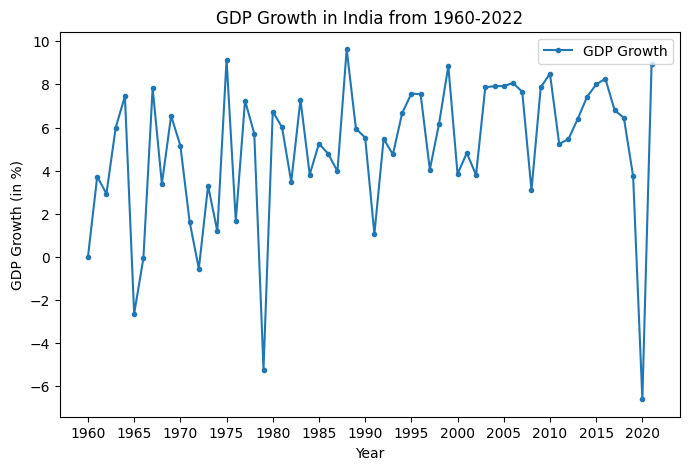

In [146]:
##Year Vs Growth
plt.figure(figsize = (8,5))
plt.plot(df.Year, df.Growth, label = "GDP Growth", marker = ".")
plt.title("GDP Growth in India from 1960-2022")
plt.legend()
plt.xticks(df.Year[::5])
plt.xlabel("Year")
plt.ylabel("GDP Growth (in %)")
plt.show()

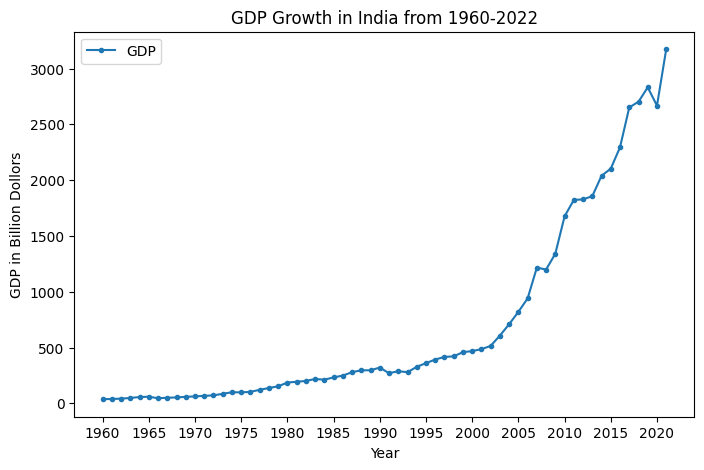

In [147]:
##Year Vs GDP
plt.figure(figsize = (8,5))
plt.plot(df.Year, df.GDP, label = "GDP", marker = ".")
plt.title("GDP Growth in India from 1960-2022")
plt.legend()
plt.xticks(df.Year[::5])
plt.xlabel("Year")
plt.ylabel("GDP in Billion Dollors")
plt.show()

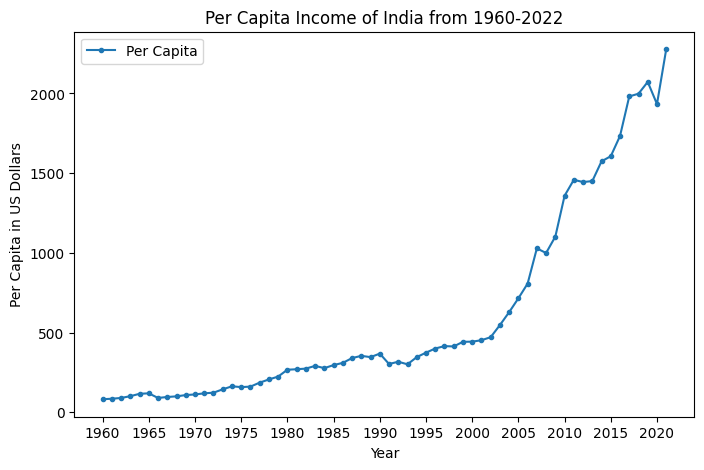

In [150]:
# Per Captita Income Vs Year
plt.figure(figsize = (8,5))
plt.plot(df.Year, df["Per Capita"], label = "Per Capita", marker = ".")
plt.title("Per Capita Income of India from 1960-2022")
plt.legend()
plt.xticks(df.Year[::5])
plt.xlabel("Year")
plt.ylabel("Per Capita in US Dollars")
plt.show()

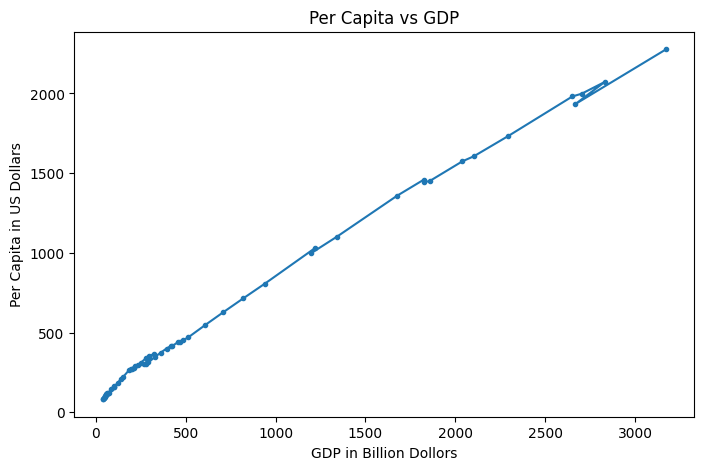

In [152]:
## GDP vs Per Capita Income
plt.figure(figsize = (8,5))
plt.plot(df.GDP, df["Per Capita"], marker = ".")
plt.title("Per Capita vs GDP")


plt.xlabel("GDP in Billion Dollors")
plt.ylabel("Per Capita in US Dollars")
plt.show()

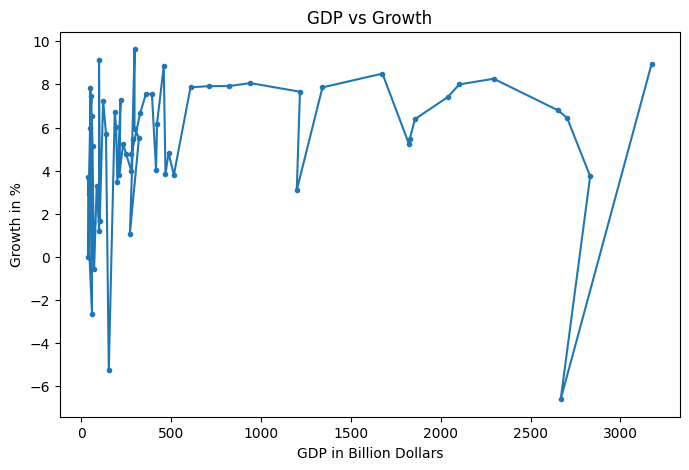

In [154]:
# GDP vs Growth
plt.figure(figsize = (8,5))
plt.plot(df.GDP, df.Growth, marker = ".")
plt.title("GDP vs Growth")
plt.xlabel("GDP in Billion Dollars")
plt.ylabel("Growth in %")
plt.show()

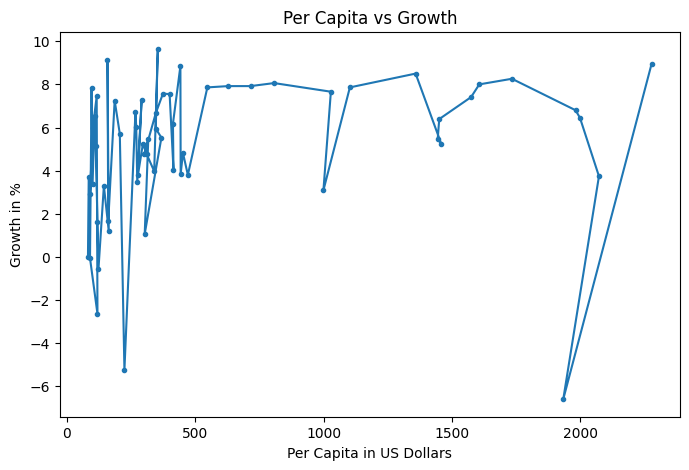

In [156]:
# Per Capita vs Growth
plt.figure(figsize = (8,5))
plt.plot(df["Per Capita"],df.Growth, marker = ".")
plt.title("Per Capita vs Growth")
plt.xlabel("Per Capita in US Dollars")
plt.ylabel("Growth in %")
plt.show()